In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

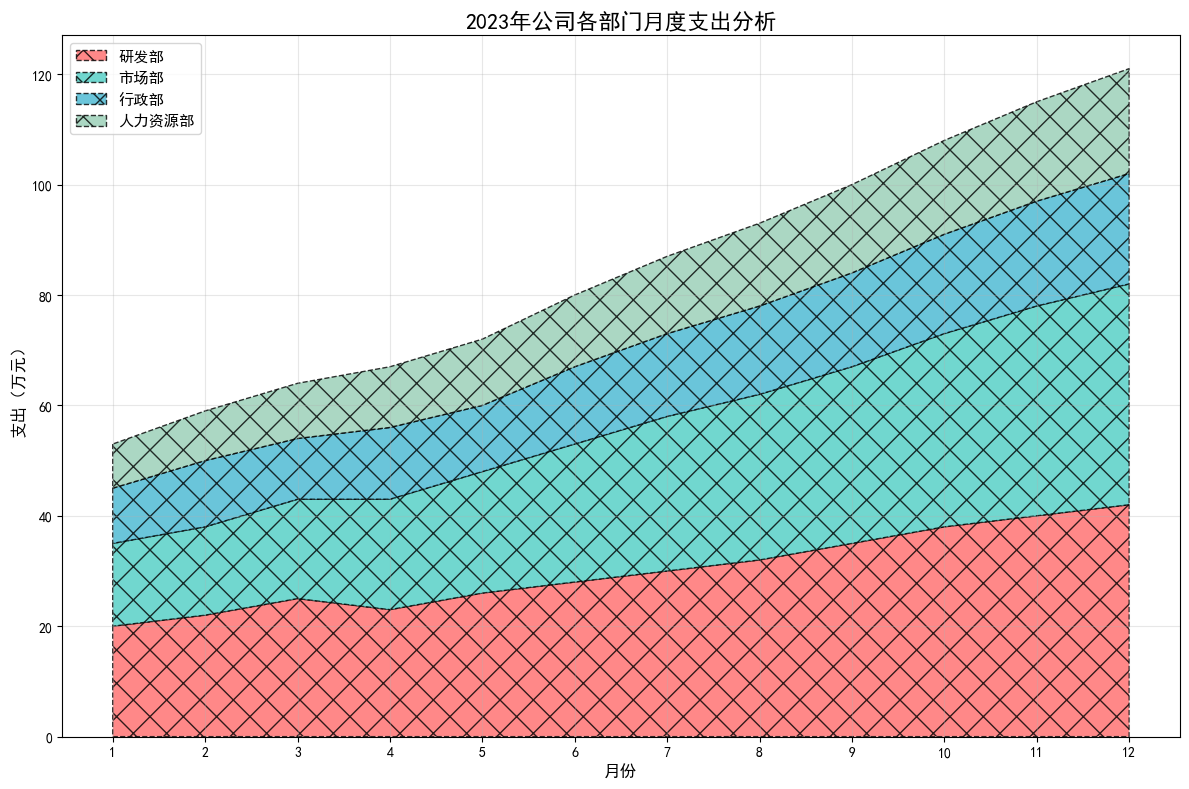

In [3]:
# 创建数据
months = np.arange(1, 13)  # 1-12月

# 各部门月度支出（单位：万元）
研发部 = [20, 22, 25, 23, 26, 28, 30, 32, 35, 38, 40, 42]
市场部 = [15, 16, 18, 20, 22, 25, 28, 30, 32, 35, 38, 40]
行政部 = [10, 12, 11, 13, 12, 14, 15, 16, 17, 18, 19, 20]
人力资源部 = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

plt.figure(figsize=(12, 8))

# 绘制堆叠折线图
plt.stackplot(months, 研发部, 市场部, 行政部, 人力资源部,           # 横轴数据 + 多组纵轴数据
              labels=['研发部', '市场部', '行政部', '人力资源部'],  # 为每组数据指定标签，用于图例显示
              colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], # 指定每组数据的填充颜色
              alpha=0.8,  # 设置填充区域的透明度
              edgecolor='k',  # 设置边缘颜色
              linestyle='--',  # 设置线型
              hatch='x',  # 设置填充图案
             )

# 添加标题和标签
plt.title('2023年公司各部门月度支出分析', fontsize=16, fontweight='bold')
plt.xlabel('月份', fontsize=12)
plt.ylabel('支出（万元）', fontsize=12)

# 添加图例
plt.legend(loc='upper left', fontsize=11)
# 设置x轴刻度
plt.xticks(months)
# 添加网格
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2、使用示例：

### 示例1：基线模式对比

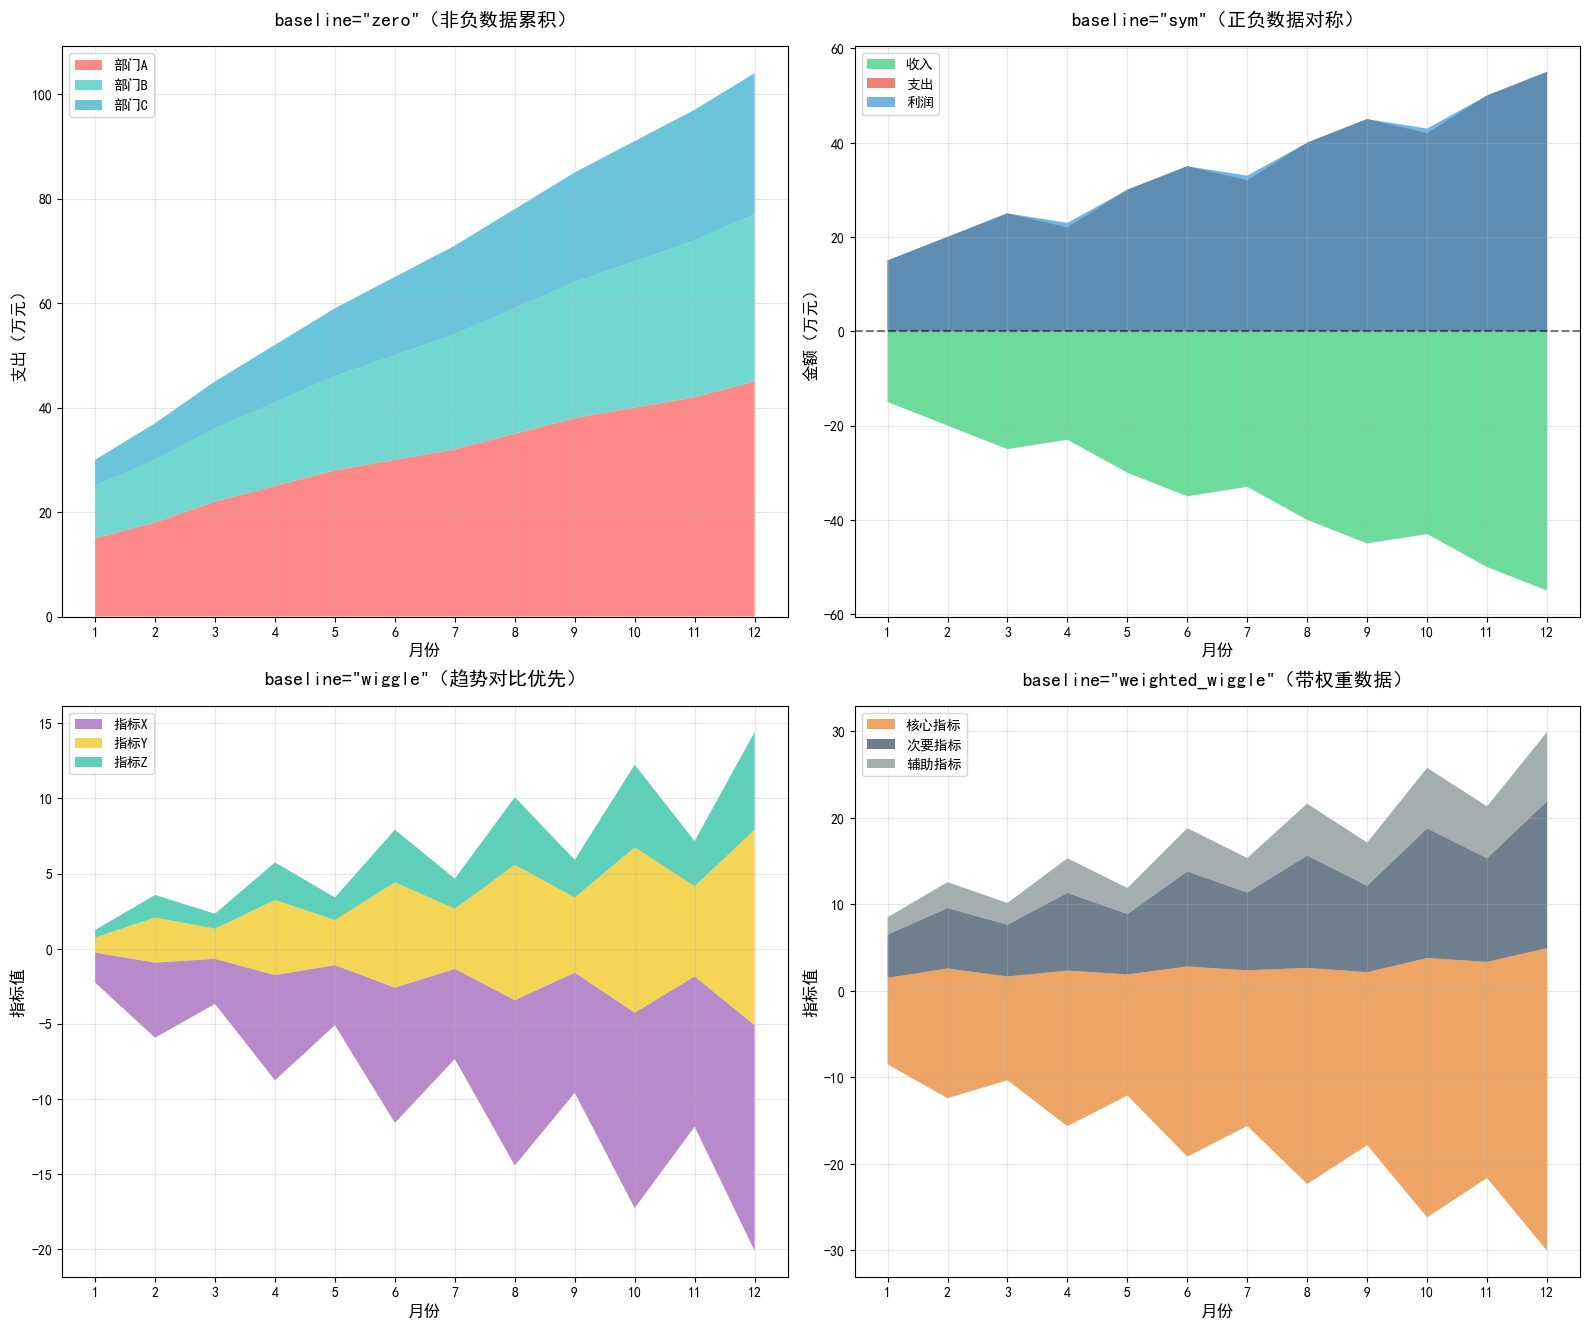

In [4]:
import matplotlib.gridspec as gridspec

# 生成通用的x轴数据（12个月）
x = np.arange(1, 13)

# ====================== 1. baseline='zero' 示例 ======================
# 场景：公司各部门非负支出数据（适合展示绝对数值累积）
dept1 = [15, 18, 22, 25, 28, 30, 32, 35, 38, 40, 42, 45]  # 部门1支出
dept2 = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]  # 部门2支出
dept3 = [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]     # 部门3支出

# ====================== 2. baseline='sym' 示例 ======================
# 场景：包含正负值的财务数据（收入为正，支出为负）
revenue = [30, 40, 50, 45, 60, 70, 65, 80, 90, 85, 100, 110]  # 收入
expense = [-15, -20, -25, -22, -30, -35, -32, -40, -45, -42, -50, -55]  # 支出
profit = np.array(revenue) + np.array(expense)  # 利润（收入+支出）

# ====================== 3. baseline='wiggle' 示例 ======================
# 场景：多指标相对变化趋势（关注波动规律，弱化绝对值）
index1 = [2, 5, 3, 7, 4, 9, 6, 11, 8, 13, 10, 15]  # 指标1
index2 = [1, 3, 2, 5, 3, 7, 4, 9, 5, 11, 6, 13]    # 指标2
index3 = [0.5, 1.5, 1, 2.5, 1.5, 3.5, 2, 4.5, 2.5, 5.5, 3, 6.5]  # 指标3

# ====================== 4. baseline='weighted_wiggle' 示例 ======================
# 场景：带权重的多维度数据（核心指标权重更高）
core = [10, 15, 12, 18, 14, 22, 18, 25, 20, 30, 25, 35]    # 核心指标（高权重）
secondary = [5, 7, 6, 9, 7, 11, 9, 13, 10, 15, 12, 17]     # 次要指标（中权重）
auxiliary = [2, 3, 2.5, 4, 3, 5, 4, 6, 5, 7, 6, 8]         # 辅助指标（低权重）

# 创建2x2网格布局的图表
fig = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)

# ============= 1. 绘制baseline='zero'的图表  =================
ax1 = fig.add_subplot(gs[0, 0])
ax1.stackplot(x, dept1, dept2, dept3,
              labels=['部门A', '部门B', '部门C'],
              colors=['#FF6B6B', '#4ECDC4', '#45B7D1'],
              alpha=0.8, baseline='zero')
ax1.set_title('baseline="zero"（非负数据累积）', fontsize=14, pad=15)
ax1.set_xlabel('月份', fontsize=12)
ax1.set_ylabel('支出（万元）', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(alpha=0.3)
ax1.set_xticks(x)

# =============  2. 绘制baseline='sym'的图表  =================
ax2 = fig.add_subplot(gs[0, 1])
ax2.stackplot(x, revenue, expense, profit,
              labels=['收入', '支出', '利润'],
              colors=['#2ECC71', '#E74C3C', '#3498DB'],
              alpha=0.7, baseline='sym')
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)  # 添加0基准线
ax2.set_title('baseline="sym"（正负数据对称）', fontsize=14, pad=15)
ax2.set_xlabel('月份', fontsize=12)
ax2.set_ylabel('金额（万元）', fontsize=12)
ax2.legend(loc='upper left')
ax2.grid(alpha=0.3)
ax2.set_xticks(x)

# =============  3. 绘制baseline='wiggle'的图表  =================
ax3 = fig.add_subplot(gs[1, 0])
ax3.stackplot(x, index1, index2, index3,
              labels=['指标X', '指标Y', '指标Z'],
              colors=['#9B59B6', '#F1C40F', '#1ABC9C'],
              alpha=0.7, baseline='wiggle')
ax3.set_title('baseline="wiggle"（趋势对比优先）', fontsize=14, pad=15)
ax3.set_xlabel('月份', fontsize=12)
ax3.set_ylabel('指标值', fontsize=12)
ax3.legend(loc='upper left')
ax3.grid(alpha=0.3)
ax3.set_xticks(x)

# =============  4. 绘制baseline='weighted_wiggle'的图表  =================
ax4 = fig.add_subplot(gs[1, 1])
ax4.stackplot(x, core, secondary, auxiliary,
              labels=['核心指标', '次要指标', '辅助指标'],
              colors=['#E67E22', '#34495E', '#7F8C8D'],
              alpha=0.7, baseline='weighted_wiggle')
ax4.set_title('baseline="weighted_wiggle"（带权重数据）', fontsize=14, pad=15)
ax4.set_xlabel('月份', fontsize=12)
ax4.set_ylabel('指标值', fontsize=12)
ax4.legend(loc='upper left')
ax4.grid(alpha=0.3)
ax4.set_xticks(x)

# 调整布局并显示
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # 调整顶部间距，避免标题重叠
plt.show()

### 示例2：添加数据标签

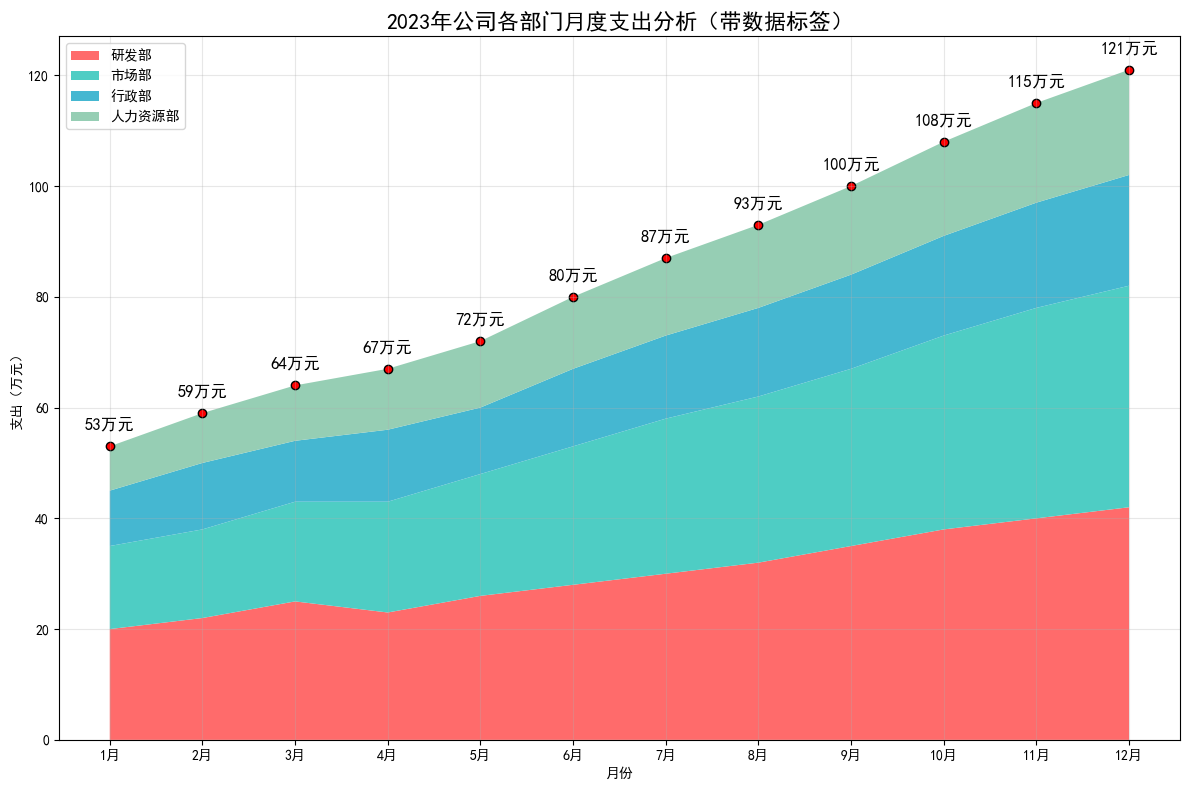

In [5]:
plt.figure(figsize=(12, 8))

# 绘制堆叠折线图
plt.stackplot(months, 研发部, 市场部, 行政部, 人力资源部,
              labels=['研发部', '市场部', '行政部', '人力资源部'],
              colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])

# 计算总支出
total = np.array(研发部) + np.array(市场部) + np.array(行政部) + np.array(人力资源部)

# 遍历每个月份，为总支出添加数值标签和标记点
# 使用enumerate获取索引i和对应的（月份, 总支出）元组
for i, (q, t) in enumerate(zip(months, total)):
    plt.text(
        i+1,          # x坐标：对应月份（+1是为了与months的数值对应）
        t+3,          # y坐标：总支出值+3（添加微小偏移，避免标签与堆叠区域重叠）
        f'{t}万元',   # 标签内容：总支出数值+单位
        ha='center',  # 水平居中对齐
        fontsize=12,  # 字体大小
        fontweight='bold'  # 字体加粗，突出显示
    )
    # 在总支出位置添加红色标记点，增强视觉提示
    plt.scatter(
        i+1,               # x坐标：对应月份
        t,                 # y坐标：总支出值（堆叠区域的顶部）
        c='red',           # 点的填充颜色为红色
        edgecolors='black' # 点的边缘颜色为黑色，增加对比度
    )

plt.title('2023年公司各部门月度支出分析（带数据标签）', fontsize=16)
plt.xlabel('月份')
plt.ylabel('支出（万元）')
plt.legend(loc='upper left')
# 设置x轴刻度
xlabels = [str(i)+"月" for i in months]
plt.xticks(months,xlabels)

plt.grid(True, alpha=0.3)
plt.tight_layout()